# Graphical comparison of differences between distributions

This notebook showcases the functions in `compare_distributions.py` which can be used to visualise and analyse differences between the distributions of different samples.  

To demonstrate these functions, `compare_distributions.py` includes various two-tailed and one-tailed statistical tests as a way of showing how the same conclusions which are shown graphically are also supported numerically. 

In [1]:
# enables nice interactive plots in jupyter. Requires ipympl to be installed
%matplotlib widget      

import scipy.stats  
import matplotlib.pyplot as plt


In [2]:
import compare_distributions

## Statistical tests to compare two samples: means, variances, and distributions - two-tailed and one-tailed

There are many statistical tests to compare two samples: Some compare the **means** of the two samples, some compare the **standard deviations**. 

Then there are some tests which look at the **entire distribution** and answer the question: are these two samples from the same distribution? Or, more precisely, if we assume that the same distribution is shared by both samples, that both samples are drawn from the same underlying distribution, then what is the probability of the actual samples being observed?

Tests like this are also sensitive to differences in means and differences in variance of the data. However just considering means and variances is often not enough. For example, a Uniform $\mathcal{U}(-\sqrt{3}, \sqrt{3})$ has mean $\mu_\mathcal{\tiny{U}}=0$ and variance $\sigma^2_\mathcal{\tiny{U}}=\frac{1}{12}(a-b)^2=\frac{1}{12}(2\sqrt{3})^2=1$, and it is perfectly possible to have a Gaussian distribution which also has mean $\mu_\mathcal{\tiny{N}}=0$ and variance $\sigma^2_\mathcal{\tiny{N}}=1$, i.e. $\mathcal{N}(0,1)$ - yet they are entirely different distributions with different PDFs and CDFs.



#### Function to generate two samples

To demonstrate this, we first need a function which generates two samples which have given sample means and variances and specified distributions. We can then make two samples from different distributions which share mean and variance, and show which tests are able to pick up on this.

In [3]:
two_samples_Normal_Uniform = compare_distributions.generate_two_samples(
                            a_dist=scipy.stats.norm,    a_mean=0, a_std=1, 
                            b_dist=scipy.stats.uniform, b_mean=0, b_std=1, 
                            size=1500, display_description=True, seed=0)

,norm,uniform,all_data
count,1500.00000,1500.00000,3000.00000
mean,0.00000,0.00000,0.00000
std,1.00000,1.00000,0.99983
min,-3.92574,-1.69247,-3.92574
25%,-0.67207,-0.84958,-0.75115
50%,-0.00605,-0.06747,-0.03741
75%,0.68595,0.85588,0.76937
max,3.11406,1.78858,3.11406


#### Visualisation functions

Visualisations are always the quickest way to easily get to grips with data, so to see how the two samples differ we need functions which will help us visualise them. 

To do this, we will plot the empirical PDFs and CDFs of the two samples, and finally a QQ-plot which shows the quantiles of the two samples. So a figure with three subplots.  

I will go through each of the subplots first before showing them all together in one figure.



#### Plot the PDFs

First we plot the estimated PDFs of the two samples using [Kernel Density Estimation](https://en.wikipedia.org/wiki/Kernel_density_estimation), along with their histograms.  
The KDE PDF will be annotated with the area of various regions - this will make it easier to compare the PDF to the greatest deviations on the CDF.  
For the same reason, the PDFs have areas shaded on them with diagonal lines. These areas represent the greatest deviations on the CDF (the KS test statistic), which will be explained in more detail later on.


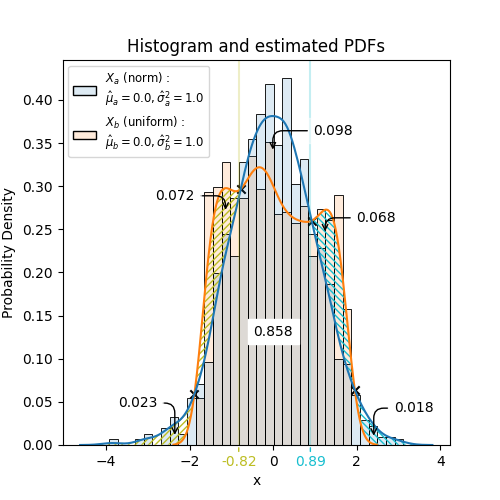

In [4]:
demo_fig, demo_ax = plt.subplots(figsize=(5,5))
ax = compare_distributions.pdfs_ax(both_samples=two_samples_Normal_Uniform, col_name_which_IDs_samples='type', ax=demo_ax)
plt.show()

The area of each segment between the KDE curves is marked. Note that the areas under each of the two PDF curves add to approximately one. (This isn't exact due to rounding of the areas, and due to treating the curves as polygons).  

The areas shaded with / and \ lines, as well as the vertical lines with ticks on the x-axis, relate to the Kolmogorov-Smirnov test for equal distributions, and will be discussed later.  

Note that the legend names the two samples according to the distribution which generated each sample. It also includes the values of the sample mean ($\hat{\mu}$) and sample variance ($\hat{\sigma}^2$). The hat signifies that the values are computed from the sample.


#### Plot the CDFs

Second, we plot the empirical CDFs, and the estimated CDFs of the two samples using [Kernel Density Estimation](https://en.wikipedia.org/wiki/Kernel_density_estimation).  
The CDF will be annotated with the greatest deviations between the two CDFs.  


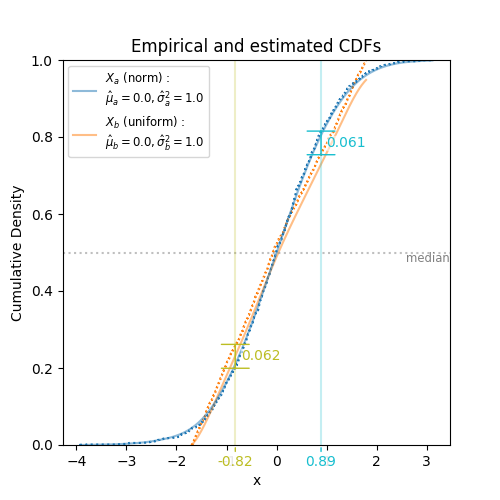

In [5]:
demo_fig, demo_ax = plt.subplots(figsize=(5,5))
compare_distributions.cdfs_ax(both_samples=two_samples_Normal_Uniform, ax=demo_ax)
plt.show()

The greatest deviations between the two CDFs is the statistic used by the Kolmogorov-Smirnov test, and are marked on the CDF: One for each CDF being greater than the other.


#### Axis QQ-plot

The last component is a function which draws a pretty QQ-plot.  

This currently only works for samples of equal sizes. Adding interpolation so that the function can handle different sample sizes is on the to-do list!

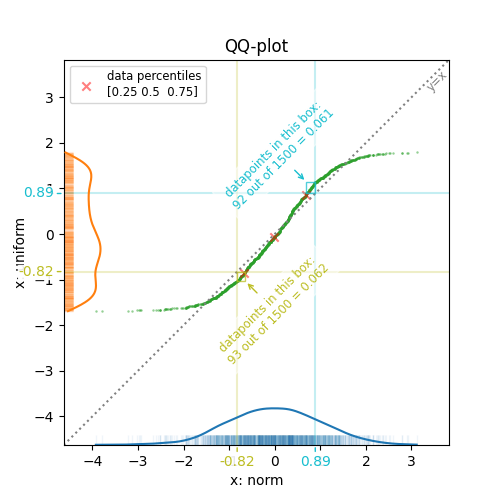

In [6]:
demo_fig, demo_ax = plt.subplots(figsize=(5,5)) 
compare_distributions.qq_plot_ax(both_samples=two_samples_Normal_Uniform, annotate_quantiles=4, ax=demo_ax, )
plt.show()

To make the QQ-plot more helpful, it also includes 
- the $y=x$ diagonal, 
- the quartiles marked on it, 
- [Rug plots](https://en.wikipedia.org/wiki/Rug_plot) next to the x-axis and y-axis to show the marginal distributions of each variable,
- [KDE estimates of the marginal PDFs](https://en.wikipedia.org/wiki/Kernel_density_estimation), again next to the x-axis and y-axis, to show the marginal distributions of each variable,
- boxes showing the Kolmogorov-Smirnov test statistic with annotations - this will be explained in detail later on in this notebook.



#### Figure QQ-plot

This function is an earlier version of the above which does a similar thing. The main difference is that it creates a figure with multiple axes, as opposed to the previous function which operates on the axes level. Therefore the previous function is better for our purpose, as it can easily be incorporated into a figure which also has the PDFs and CDFs.

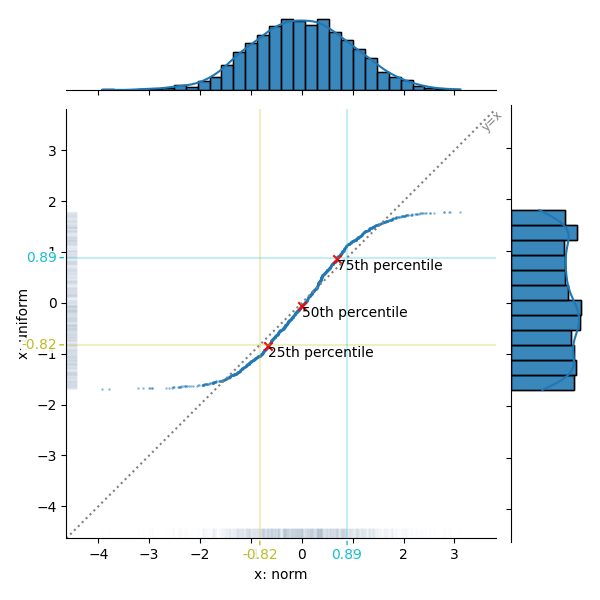

In [7]:
compare_distributions.qq_plot_fig(data=two_samples_Normal_Uniform, annotate_quantiles=4, )

#### Draw a figure including the PDFs, CDFs, and QQ-plot

And now we need a function which uses the previous (axes-based) functions to plot the PDFs for both samples, and the CDFs for both samples, and then a QQ-plot.  

To visually show the difference between the two distributions, on the CDF we will have markers showing the location of the greatest distance between the two CDFs. The distance itself will also be written on the plot, this is the statistic used by the Kolmogorov-Smirnov test, as will be discussed.    

Similarly, on the plot with the PDFs, we will shade the area representing the difference between the cumulative densities of the two curves, at the points where the distance is greatest.

Similarly, on the QQ-plot, we will draw a box around the points representing the difference between the cumulative densities of the two distributions, at those points where the difference is greatest.

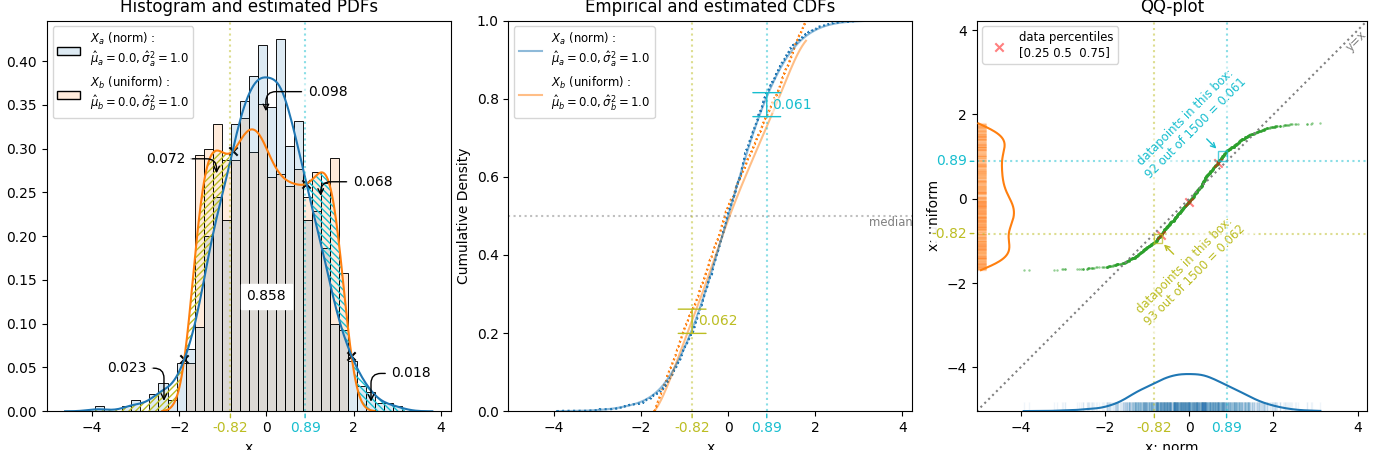

In [8]:
compare_distributions.plot_two_samples(both_samples=two_samples_Normal_Uniform)
plt.show()


##### KS test statistic

**CDF:** The KS test statistic in its most recognised form is shown on the CDF: the greatest deviation between the two empirical CDFs. The locations of the deviations are marked on the x-axis. The first marker is for when one of the CDFs is greater, the second marker is for when the other CDF is greater. The markers are only shown if there is reasonable certainty that the deviations show that the distributions are different ($\alpha<0.05$).

**PDF:** The KS test statistic is also shown on the PDF, with the two regions shaded with diagonal lines. On the PDF, the KS test statistic is the difference between the area under the two curves, from $-\infty$ until the location where that difference in area is greatest.
So the first shaded region, on the left of the PDF, corresponds to the first deviation marked on the CDF. Note that the shaded region goes from $-\infty$ until the location marked on the CDF. And note that the area of where the second curve is higher than the first, minus the area of where the first curve is higher than the second, is close to the value of the statistic marked on the CDF. (Again, this isn't exact due to rounding of the areas, and due to treating the curves as polygons, and inaccuracies of the KDE approximation).  
Similarly, the second shaded region, on the right of the PDF, corresponds to the second deviation marked on the CDF. Note that the shaded region goes from the location marked on the CDF until $\infty$. And note that the area of where the second curve is higher than the first, minus the area of where the first curve is higher than the second, is close to the value of the statistic marked on the CDF.  
We also see on the PDF that the locations of the two KS test statistics are at an intersection of the two PDF lines. This makes perfect sense: The PDF is the rate of change of the CDF. So the difference between the two CDFs continues to increase, for as long as one PDF curve is above the other. Once the other PDF curve goes higher, then the difference between the CDFs will begin to decrease - so the greatest difference will be as this changes, i.e. at the intersection on the PDF.  

**QQ-plot:** Finally, the KS test statistic is also shown on the QQ-plot, with the two boxes around points. On the QQ-plot, the KS test statistic is the difference between the number of points below a horizontal line at a fixed position, and the number of points before a vertical line at the same fixed position - where the position is chosen in such a way as to maximise that difference. Thus the important places to look at are the North West quadrant and the South East quadrant. Looking at the annotations on the QQ-plot, this clearly corresponds to the values annotated on the CDF.


### Example #1: data from the Normal distribution and from the Uniform distribution

Now we can use those functions to generate two samples with identical mean $\mu=0$ and variance $\sigma^2=1$, one Normal and the other Uniform. (This is the same as what we've been using as an example previously). Then we can draw all those plots to visualise the data:

In [9]:
two_samples_Normal_Uniform

,x,type
0,0.142371,norm
1,-0.118216,norm
2,0.662556,norm
3,0.121318,norm
4,-0.526088,norm
...,...,...
1495,-0.961561,uniform
1496,1.412560,uniform
1497,-1.006077,uniform
1498,-0.824877,uniform


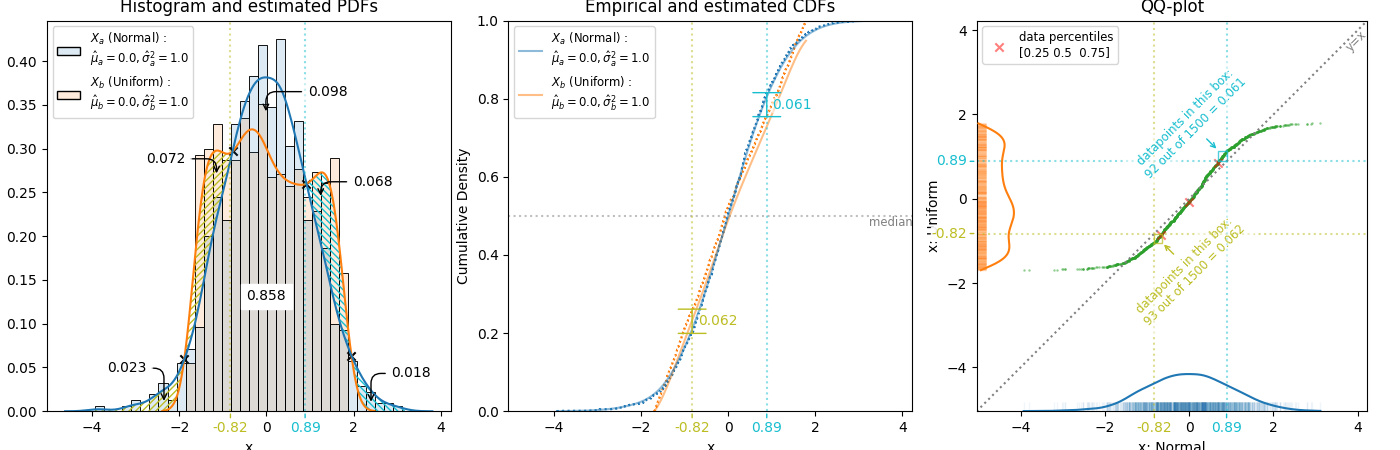

In [10]:

two_samples_Normal_Uniform = compare_distributions.generate_two_samples(
                        a_dist=scipy.stats.norm,    sample_a_name='Normal', 
                        b_dist=scipy.stats.uniform, sample_b_name='Uniform', 
                        size=1500, display_description=False, seed=0)
# two_samples_Normal_Uniform = compare_distributions.generate_two_samples(
#                             a_dist=scipy.stats.norm,    a_mean=0, a_std=1, 
#                             b_dist=scipy.stats.uniform, b_mean=0, b_std=1, 
#                             size=1500, display_description=True, seed=0)
compare_distributions.plot_two_samples(both_samples=two_samples_Normal_Uniform)

plt.show()

So although mean and variance are identical for the two samples, nonetheless the distributions are clearly very different. In this case the difference is so pronounced that this can be seen clearly even on the PDF histogram/KDE and on the CDF plots, and is even clearer on the QQ-plot.

#### Notes about the plots:   
- The first two plots have light vertical lines which indicate the position of the maximum deviation between the two CDFs. In the above example, these are located at approximately $\pm0.80$.
- To further show the greatest deviations between the CDFs, the distance between them at these positions is marked with an $\textbf{I}$, annotated with the value of that distance (which is the statistic of the KS test). 
- Similarly, to show these greatest deviations on the PDFs also, the area between the PDFs before and after these positions are shaded with diagonal lines. For example, there is / shading between $[-\infty, -0.8]$, because if you subtract the area where the orange line is above the blue line, from the area where the blue line is above the orange line, it is greatest going up to $-0.8$. This is because after $-0.8$ the blue line rises above the orange line again, so the total "orange area minus blue area" starts decreasing. This corresponds to the first mark on the CDF. (The second mark on the CDF is shown using \ shading, and for clarity goes from the place of greatest deviation to the right, i.e. $[0.8, \infty]$.)
- On the QQ-plot, these are shown with annotated boxes.
- All these indications are given consistent colours through all three plots. 
- In the second plot, the solid orange line is the estimated CDF of the Uniform sample. Any smoothing at the top and bottom of the CDF is inappropriate here, as the uniform CDF should be a straight line. The dotted line is the empirical CDF, and this is straight, as would be expected.

## Statistical tests

We now use statistical tests to identify differences between the two samples. This tests for equal means, variances, and distribution (2-sided):

In [11]:
compare_distributions.stats_tests_mean_sd_dist_2_sided(data=two_samples_Normal_Uniform)

,test,statistic,pvalue,statistic_location,statistic_sign
Ttest_indResult,Ttest_ind,-4.313415e-15,1.000000,NaN,NaN
BartlettResult,Bartlett,-3.327339e-13,1.000000,NaN,NaN
KstestResult,Kstest,6.200000e-02,0.006253,-0.824785,-1.0


The first test, the **T-test**, is for means: If in truth the two RVs have the same mean, what is the probability of the two samples being observed? Or to be more precise, what is the probability of observing two samples which have an equal or greater difference between their means? This has a $p$-value of 1 - it is highly probable (because there is *no* difference between the means of the two samples). 

The second test, **Bartlett's test**, is for variance: If the two RVs essentially have the same variance, what is the probability of the two samples being observed (i.e. of the observed samples having a greater or equal difference in their variances)? Again, this has a $p$-value of 1 - it is highly probable. 

The final test is the **Kolmogorov-Smirnov test**. This is the standard method for comparing the entire distribution. Here, it convincingly rejects the suggestion that the two RVs have the same distribution: if they did, then the probability of the two samples being observed (i.e. two samples whose distribution differs by that much or more) would be minute. We therefore reject that and conclude that the two samples are drawn from different RVs.


### Example #2: data from the Normal distribution and from the T distribution

With Normal and Uniform data, the fact that they are different was immediately visually obvious. 

A less obvious example compares the Normal distribution to the [T-distribution, $t_\nu$](https://en.wikipedia.org/wiki/Student%27s_t-distribution). The data is drawn from $t_4$, so $\nu=4$, i.e. 4 degrees of freedom. As $\nu \to \infty$,  $t_\nu$ becomes the standard Normal distribution $\mathcal{N}(0,1)$, but for $\nu=4$ there are still significant differences between the distributions which can be picked up with a modest sample size:

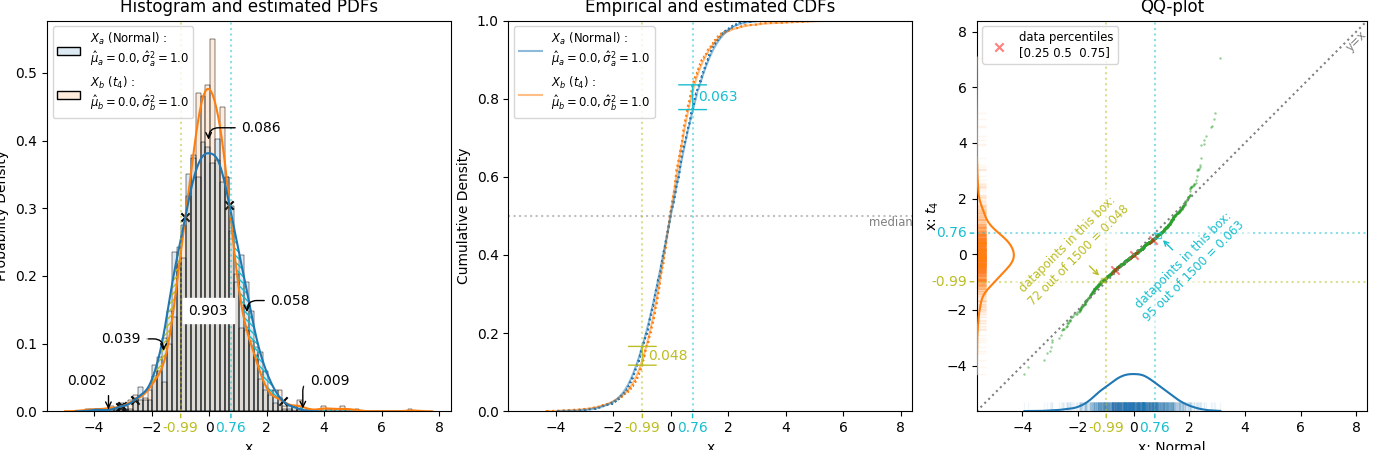

In [12]:
t_df=4
sample_b_name='T [df='+str(t_df)+']'
sample_b_name='$t_'+str(t_df)+'$'
two_samples_Normal_T = compare_distributions.generate_two_samples(
                        a_dist=scipy.stats.norm,    a_kwargs={},        sample_a_name='Normal',
                        b_dist=scipy.stats.t,       b_kwargs={'df':t_df},  sample_b_name=sample_b_name,
                        size=1500,      display_description=False,       seed=0)

compare_distributions.plot_two_samples(both_samples=two_samples_Normal_T)
plt.show()


- Here, the PDFs are similar, although differences can be seen. 
- Visual inspection of the CDFs doesn't really reveal any difference. 
- This is where the QQ-plot comes in useful - it makes it very clear that the $t_4$ distribution has heavier tails than the Normal does. This is shown because points which are the same quantile in both samples have greater values on the y-axis, representing the T-distribution, than they do on the x-axis, which represents the Normal distribution. In other words, the tails of the T are heavier.

However the QQ-plot is not a rigorous test in that it doesn't quantify its findings. Once again we will run the three tests for mean, variance, and distribution:

In [13]:
compare_distributions.stats_tests_mean_sd_dist_2_sided(data=two_samples_Normal_T)

,test,statistic,pvalue,statistic_location,statistic_sign
Ttest_indResult,Ttest_ind,-8.756556e-16,1.000000,NaN,NaN
BartlettResult,Bartlett,1.514108e-28,1.000000,NaN,NaN
KstestResult,Kstest,6.333333e-02,0.004866,0.760886,1.0


And again we find that there is no evidence that the means are different; and no evidence that the variances are different; but strong evidence that the distributions are different. If the sample sizes were bigger, the evidence would be expected to be even stronger.

### Example #3: data from the Normal distribution, with different means

We now look at data from the same distribution, and with the same variance, but with slightly different means:


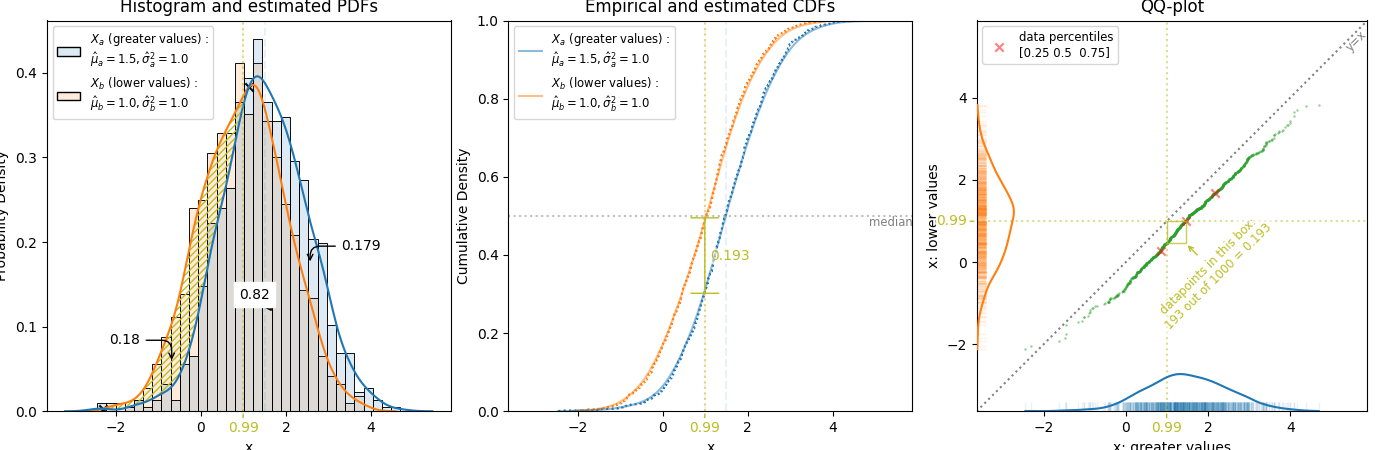

In [14]:
two_samples_Normal_different_means = compare_distributions.generate_two_samples(
                        a_dist=scipy.stats.norm,  a_mean=1.5, a_std=1,     sample_a_name='greater values',
                        b_dist=scipy.stats.norm,  b_mean=1, b_std=1, sample_b_name='lower values',
                        size=1000,      display_description=False,       seed=0)

compare_distributions.plot_two_samples(both_samples=two_samples_Normal_different_means)
plt.show()


In these examples, sample a has a greater mean that sample b does. 

It is worth looking at the plots to understand this graphically, as this will build intuition which will be required later for one-sided KS tests: 

- Looking carefully at the PDFs, we see that the blue data are more to the right, indicating that sample a tends to be greater than sample b.
- The CDFs require a bit more thought: The blue CDF is *lower* than the orange one, indicating that for any given value of $x$, sample a has a *lower* probability of being *less* than that value than sample b does - i.e. again indicating that sample a tends to be ***greater*** than sample b.
- The QQ-plot shows that the points are in a straight line, because both distributions are the same. However the points are all slightly below the $y=x$ diagonal line. So values of b (the y-axis) are lower than corresponding values of a (x-axis) (additive shift).

Looking at the statistical tests:

In [15]:
compare_distributions.stats_tests_mean_sd_dist_2_sided(data=two_samples_Normal_different_means)

,test,statistic,pvalue,statistic_location,statistic_sign
Ttest_indResult,Ttest_ind,1.118034e+01,3.428057e-28,NaN,NaN
BartlettResult,Bartlett,-1.108558e-13,1.000000e+00,NaN,NaN
KstestResult,Kstest,1.930000e-01,1.072206e-16,0.991837,-1.0


As expected:  
- the T-test shows that the mean is different
- the Bartlett test doesn't tell us that the variance is different (as it is in fact the same). 
- and since the mean is different, the distribution is different as well (even though both are normal) - so the KS test also tells us to reject.

### One-sided KS tests

The advantage of the Kolmogorov-Smirnov test is that it can easily be used to test for whether one distribution is greater than the other. The above test was two-sided, so it would have rejected (given a small $p$-value) if the CDF of the first was greater, or if the CDF of the second was greater. But with one-sided tests, we can test for just one way. On the graphs above, the greatest deviations are shown both ways, using two one-sided tests, one in each direction.  

It takes some time to get used to the way this works, as this can be confusing with a lot of double negatives. Let's try to think it through with the help of a few examples to illustrate.  

First, we need a statistical testing function to include one-sided tests:

In [16]:
compare_distributions.stats_tests_mean_sd_dist_2_sided(data=two_samples_Normal_different_means) 

,test,statistic,pvalue,statistic_location,statistic_sign
Ttest_indResult,Ttest_ind,1.118034e+01,3.428057e-28,NaN,NaN
BartlettResult,Bartlett,-1.108558e-13,1.000000e+00,NaN,NaN
KstestResult,Kstest,1.930000e-01,1.072206e-16,0.991837,-1.0


In [17]:
compare_distributions.stats_tests_mean_sd_dist_1_sided(data=two_samples_Normal_different_means)

,test,alternative,alternative_explained,statistic,pvalue,statistic_location,statistic_sign
Ttest_indResult,Ttest_ind,less,mean(greater values) is less,11.18034,1.000000e+00,NaN,NaN
Ttest_indResult,Ttest_ind,greater,mean(greater values) is greater,11.18034,1.714028e-28,NaN,NaN
KstestResult,Kstest,less,CDF(greater values) is less,0.19300,5.361032e-17,0.991837,-1.0
KstestResult,Kstest,greater,CDF(greater values) is greater,0.00200,9.960100e-01,-2.310978,1.0


Looking at those values is puzzling. For the T-test, we reject the null when the alternative is *greater*. But for the KS-test, we reject the null when the alternative is *less*.  

How does that make sense?  

The scipy documentation is usually the epitome of clarity, but for the [KS test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ks_2samp.html) it leaves a fair amount unsaid. So let's go through this carefully: there are multiple negatives here in the language of hypothesis testing, so this needs to be thought through.  

##### `scipy.stats.ks_2samp(a, b, alternative='less')`  
- This means that the alternative hypothesis states that sample **a** has a CDF which is **less** than the CDF of sample **b** : $H_1 \ : \ F_a(x) < F_b(x) $.  
- Thinking about the values of the data, this means that the alternative hypothesis can be proven if sample a (at least at some point of the empirical CDF) has values which are significantly **greater** than the values of sample b, as **greater** values means that the CDF will be **lower**.  
- So the **null** hypothesis states that sample a has a CDF which is **greater than or equal to** than the CDF of sample **b** : $H_0 \ : \ F_a(x) \geq F_b(x) $.
- Thinking about the values of the data, this means that according to the **null** hypothesis, we expect that sample a will have values which are generally **less than or equal to** the values of sample b, as **lower** values means that the CDF will be **greater**.  
- So in our case, sample a is the values with the greater mean. As the values of sample a tend to be greater, the CDF of sample a will tend to be lower, as the alternative hypothesis believes. So we would expect the null for this alternative hypothesis to be **rejected**, in favour of the alternative.  
- This is indeed what happens: in the second last row of the previous table, we have a very low $p$-value, showing that the data is very improbable according to the null. 
- I.e. $\text{P}(X_a, X_b \ | \ H_0 \ : \ F_a(x) \geq F_b(x) ) < 0.05$, so we reject at the standard level of 0.05 (and much lower also). 

##### `scipy.stats.ks_2samp(a, b, alternative='greater')`   
- This means that the alternative hypothesis states that sample **a** has a CDF which is **greater** than the CDF of sample **b** : $H_1 \ : \ F_a(x) > F_b(x) $.    
- Thinking about the values of the data, this means that the alternative hypothesis can be proven if sample a (at least at some point of the empirical CDF) has values which are significantly **less** than the values of sample b, as **lower** values means that the CDF will be **greater**.    
- So the **null** hypothesis states that sample a has a CDF which is **less than or equal to** than the CDF of sample **b** : $H_0 \ : \ F_a(x) \leq F_b(x) $.  
- Thinking about the values of the data, this means that according to the **null** hypothesis, we expect that sample a will have values which are generally **greater than or equal to** the values of sample b, as **greater** values means that the CDF will be **lower**.  
- So in our case, sample a is the values with the greater mean. As the values of sample a tend to be greater, the CDF of sample a will tend to be lower, which fits perfectly well with the null hypothesis. So we would expect to **fail to reject** the null for this alternative hypothesis, as looking at the data, the null makes perfect sense.  
- This is indeed what happens: in the last row of the previous table, we have a very high $p$-value of almost $1$, showing that the data is very probable according to the null.  
- I.e. $\text{P}(X_a, X_b \ | \ H_0 \ : \ F_a(x) \leq F_b(x) ) > 0.05$, so we don't reject at the standard level of 0.05 (and much higher also).  

Reproducing the plots of this dataset is helpful in thinking through this process:  


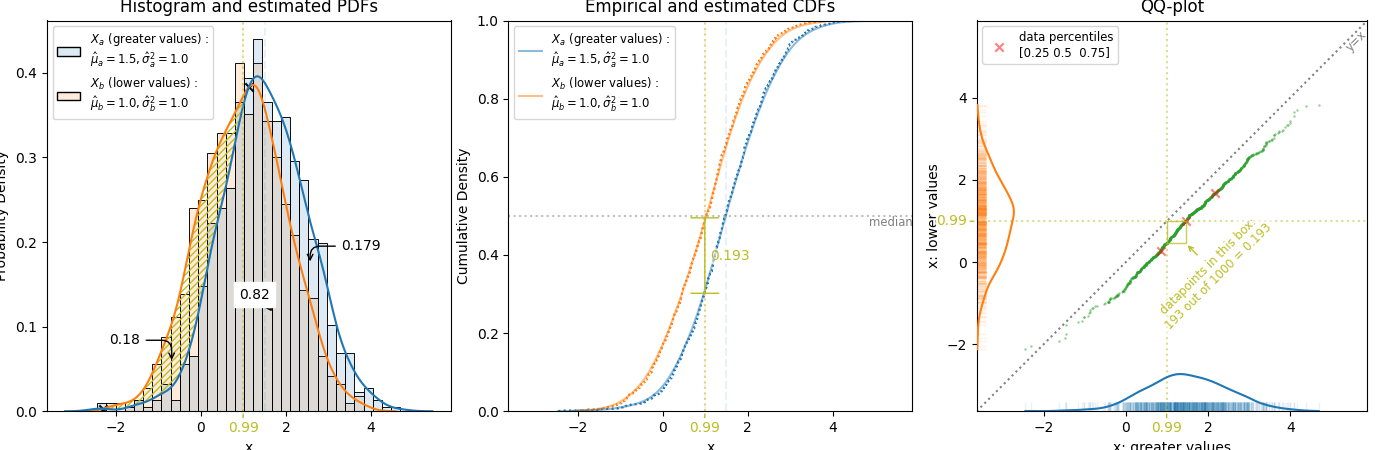

In [18]:
compare_distributions.plot_two_samples(both_samples=two_samples_Normal_different_means)
plt.show()


### Example #4: data from the Normal distribution, with different variance

We again look at data from the same distribution, but this time with the same means, and with slightly different variances:


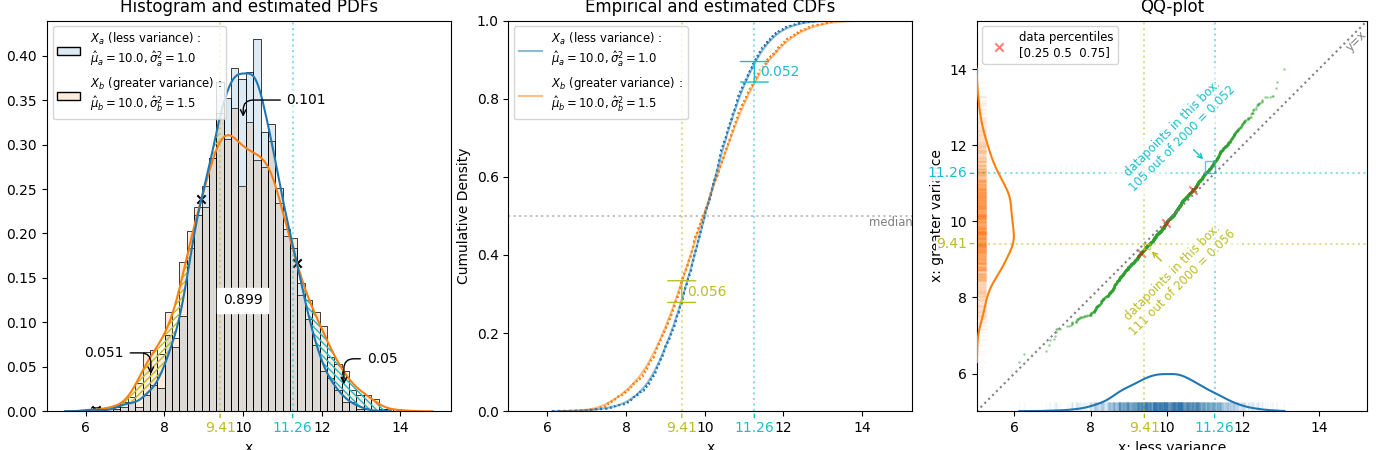

In [19]:
two_samples_Normal_different_variances = compare_distributions.generate_two_samples(
                        a_dist=scipy.stats.norm,  a_mean=10, a_std=1,       sample_a_name='less variance',
                        b_dist=scipy.stats.norm,  b_mean=10, b_std=1.5**.5, sample_b_name='greater variance',
                        size=2000,      display_description=False,       seed=0)

compare_distributions.plot_two_samples(both_samples=two_samples_Normal_different_variances)
plt.show()


- The PDFs and CDFs are self-explanatory
- The QQ-plot shows the quantiles are approximately in a straight line. This is because the distribution is the same, they are both Normal. However, they aren't on the $y=x$ line: on the y-axis there is a greater variance - because the y-axis plots the RV whose variance is indeed greater (multiplicative shift).

In [20]:
compare_distributions.stats_tests_mean_sd_dist_2_sided(data=two_samples_Normal_different_variances) 

,test,statistic,pvalue,statistic_location,statistic_sign
Ttest_indResult,Ttest_ind,0.000000,1.000000e+00,NaN,NaN
BartlettResult,Bartlett,81.582761,1.680738e-19,NaN,NaN
KstestResult,Kstest,0.055500,4.215542e-03,9.414648,1.0


In [21]:
compare_distributions.stats_tests_mean_sd_dist_1_sided(data=two_samples_Normal_different_variances) 

,test,alternative,alternative_explained,statistic,pvalue,statistic_location,statistic_sign
Ttest_indResult,Ttest_ind,less,mean(greater variance) is less,0.0000,0.500000,NaN,NaN
Ttest_indResult,Ttest_ind,greater,mean(greater variance) is greater,0.0000,0.500000,NaN,NaN
KstestResult,Kstest,less,CDF(greater variance) is less,0.0525,0.004031,11.260406,-1.0
KstestResult,Kstest,greater,CDF(greater variance) is greater,0.0555,0.002108,9.414648,1.0


- Here, the Bartlett test clearly rejects the hypothesis that the two samples have the same variance.
- The T-tests don't prove anything about whether the mean of the two samples is the same or not.
- The one-sided KS tests prove that the CDF of the first RV is less than the other CDF; and simultaneously proves the opposite, that the CDF of the first RV is greater than the other CDF. This is because in different locations the CDF is sometimes less and sometimes greater, as can be seen on the plots.

### Example #5: data from the Tukey-Lambda and Beta distributions

For fun we look at some less common distributions, [Tukey-Lambda](https://en.wikipedia.org/wiki/Tukey_lambda_distribution) and [Beta](https://en.wikipedia.org/wiki/Beta_distribution):


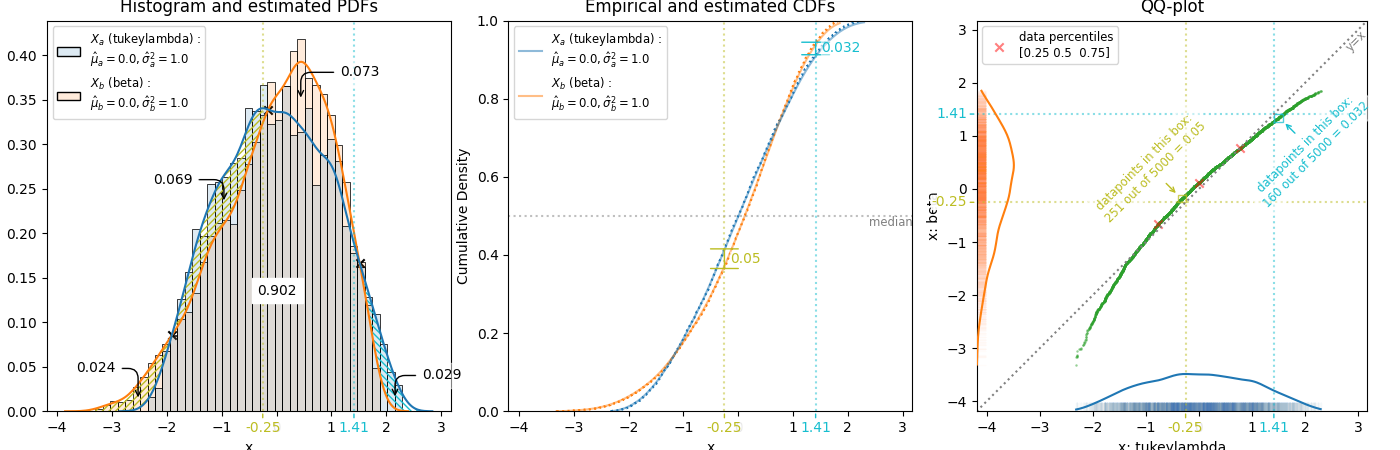

In [22]:
two_samples_exotic = compare_distributions.generate_two_samples(
                        a_dist=scipy.stats.tukeylambda,     a_kwargs=dict(lam=.4), 
                        b_dist=scipy.stats.beta,            b_kwargs=dict(a=4, b=2), 
                        size=5000,      display_description=False,       seed=0)

ax1, ax2, ax3 = compare_distributions.plot_two_samples(both_samples=two_samples_exotic)
plt.show()

In [23]:
compare_distributions.stats_tests_mean_sd_dist_2_sided(data=two_samples_exotic) 

,test,statistic,pvalue,statistic_location,statistic_sign
Ttest_indResult,Ttest_ind,3.041123e-14,1.000000,NaN,NaN
BartlettResult,Bartlett,-1.109890e-12,1.000000,NaN,NaN
KstestResult,Kstest,5.020000e-02,0.000007,-0.25117,-1.0


In [24]:
compare_distributions.stats_tests_mean_sd_dist_1_sided(data=two_samples_exotic) 

,test,alternative,alternative_explained,statistic,pvalue,statistic_location,statistic_sign
Ttest_indResult,Ttest_ind,less,mean(beta) is less,3.041123e-14,0.500000,NaN,NaN
Ttest_indResult,Ttest_ind,greater,mean(beta) is greater,3.041123e-14,0.500000,NaN,NaN
KstestResult,Kstest,less,CDF(beta) is less,5.020000e-02,0.000003,-0.251170,-1.0
KstestResult,Kstest,greater,CDF(beta) is greater,3.200000e-02,0.005974,1.412497,1.0


# Comparing a sample to a theoretical distribution

Above we compared two empirical samples. Now we use the same visualisations to compare an empirical sample to a theoretical distribution. This is useful for ascertaining whether a sample is for example normal.  

The function takes the single sample, together with a frozen scipy random variable representing the theoretical distribution to compare it to.

Using this function to compare data drawn from a Beta distribution to the theoretical standard Normal distribution:

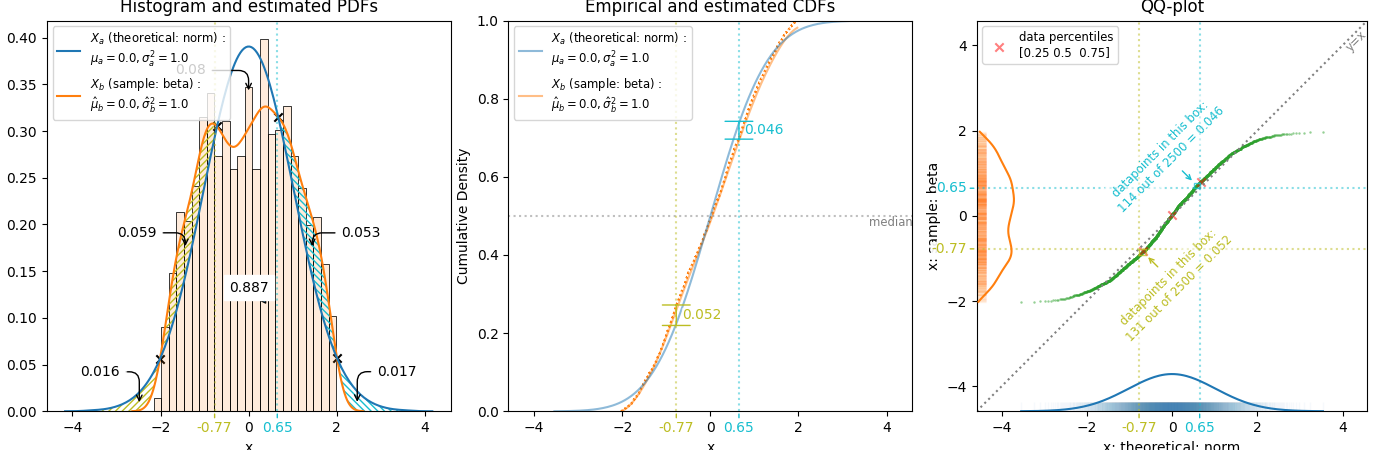

In [25]:
sample = compare_distributions.generate_two_samples(
            a_dist=scipy.stats.uniform,    
            b_dist=scipy.stats.beta,            b_kwargs=dict(a=1.5, b=1.5), 
            size=2500,      display_description=False,       seed=0)
# sample=sample[sample.type=='uniform']
sample=sample[sample.type=='beta']

ax_pdf, ax_cdf, ax_qq = compare_distributions.plot_sample_with_theoretical_dist(sample, frozen_distribution=scipy.stats.norm(loc=0, scale=1**.5))

Note that on the legends, the theoretical plot has the mean and variance marked on it as $\mu$ and $\sigma^2$ rather than as $\hat{\mu}$ and $\hat{\sigma}^2$. This is because in the case of the theoretical plot, the mean and variance are the actual mean and variance of the RV.  

Secondly, the theoretical distribution doesn't have a histogram on the first plot, and doesn't have an empirical CDF (dotted line) on the second.  

On the QQ-plot the theoretical distribution is plotted on the x-axis as that appears to be the convention.